In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
X = df.drop(["target", "index"], axis=1)
y = df[["target"]]

In [3]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [5]:
import shap

In [6]:
reg = LinearRegression().fit(train_X, train_y)

In [7]:
train_cut_X = train_X[train_X.columns[:5]]
test_cut_X = test_X[test_X.columns[:5]]

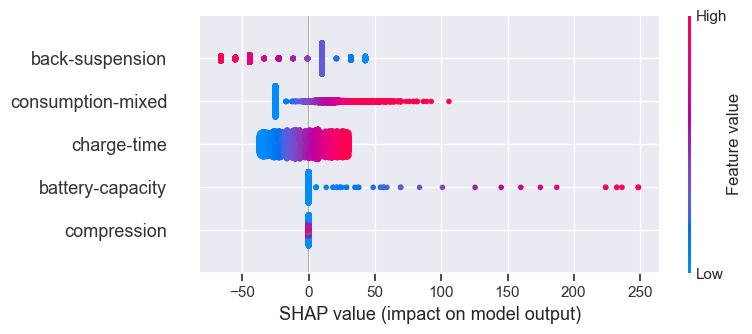

In [8]:
reg = LinearRegression().fit(train_cut_X, train_y)

explainer = shap.Explainer(reg, train_cut_X)
shap_values = explainer(test_cut_X)

shap.summary_plot(shap_values, test_cut_X)

In [9]:
all_features = train_cut_X.columns

In [10]:
all_features

Index(['back-suspension', 'battery-capacity', 'charge-time', 'compression',
       'consumption-mixed'],
      dtype='object')

In [11]:
import math

In [12]:
model = LinearRegression()

In [13]:
train_cut_X

,back-suspension,battery-capacity,charge-time,compression,consumption-mixed
22607,3,-1.0,11636,9.5,-1.0
36531,8,-1.0,31764,9.0,-1.0
24048,8,-1.0,2773,8.8,6.8
34819,3,-1.0,52039,14.0,5.3
1328,3,-1.0,20689,18.0,7.5
...,...,...,...,...,...
6265,6,-1.0,42729,16.5,4.7
11284,0,-1.0,46093,8.1,-1.0
38158,3,-1.0,48819,10.0,7.6
860,10,-1.0,9346,22.4,-1.0


In [14]:
test_cut_X

,back-suspension,battery-capacity,charge-time,compression,consumption-mixed
22894,10,-1.0,6384,8.2,-1.0
27055,10,-1.0,5682,-1.0,-1.0
40027,8,-1.0,15790,9.5,5.5
41228,3,-1.0,36828,-1.0,-1.0
20814,3,-1.0,39082,10.5,-1.0
...,...,...,...,...,...
37121,3,-1.0,12328,10.0,8.7
32691,3,-1.0,47912,9.1,7.3
18009,3,-1.0,23810,8.9,6.0
3254,3,-1.0,23486,10.0,-1.0


In [15]:
N = all_features

In [16]:
lis = []
li = []
for d in all_features:
    lis.append(d)
for u in lis:
    item = u
    lis.remove(u)
    lis.insert(0, u)
    print(u)
    sets = []
    len_S= len(lis[1:])
    for j in range(1<<len_S):
        subset = [lis[1:][bit] for bit in range(len_S)if j &(1<<bit)]
        sets.append( subset )
        all_S = sets[1:]
    print(all_S)
    for b in range(len(all_S)):
        dr = (math.factorial(len(all_S[b]))*math.factorial(len(N)-len(all_S[b])-1))/math.factorial(len(N))
        result = pd.merge(train_cut_X[all_S[b]],pd.DataFrame(train_cut_X[u]),left_index=True,right_index = True )
        k = model.fit(result,train_y)
        score_before = model.score(result,train_y)
        a = model.fit(train_cut_X[all_S[b]],train_y)
        score_after = model.score(train_cut_X[all_S[b]],train_y)
        razn = score_before - score_after
        ag = dr*razn
        li.append(ag)
    if u == 'back-suspension':
        print('Сумма',sum(li[:15]))
    if u == 'battery-capacity':
        print('Сумма',sum(li[15:30]))
    if u =='charge-time':
        print('Сумма',sum(li[30:45]))
    if u == 'compression':
        print('Сумма',sum(li[45:60]))
    if u == 'consumption-mixed':
        print('Сумма',sum(li[60:75]))

back-suspension
[['battery-capacity'], ['charge-time'], ['battery-capacity', 'charge-time'], ['compression'], ['battery-capacity', 'compression'], ['charge-time', 'compression'], ['battery-capacity', 'charge-time', 'compression'], ['consumption-mixed'], ['battery-capacity', 'consumption-mixed'], ['charge-time', 'consumption-mixed'], ['battery-capacity', 'charge-time', 'consumption-mixed'], ['compression', 'consumption-mixed'], ['battery-capacity', 'compression', 'consumption-mixed'], ['charge-time', 'compression', 'consumption-mixed'], ['battery-capacity', 'charge-time', 'compression', 'consumption-mixed']]
Сумма 0.016783939046755025
battery-capacity
[['back-suspension'], ['charge-time'], ['back-suspension', 'charge-time'], ['compression'], ['back-suspension', 'compression'], ['charge-time', 'compression'], ['back-suspension', 'charge-time', 'compression'], ['consumption-mixed'], ['back-suspension', 'consumption-mixed'], ['charge-time', 'consumption-mixed'], ['back-suspension', 'charge

In [17]:
lis = []
li = []
for d in all_features:
    lis.append(d)
for u in lis:
    item = u
    lis.remove(u)
    lis.insert(0, u)
    print(u)
    sets = []
    len_S= len(lis[1:])
    for j in range(1<<len_S):
        subset = [lis[1:][bit] for bit in range(len_S)if j &(1<<bit)]
        sets.append( subset )
        all_S = sets[1:]
    print(all_S)
    for b in range(len(all_S)):
        dr = (math.factorial(len(all_S[b]))*math.factorial(len(N)-len(all_S[b])-1))/math.factorial(len(N))
        resultik = pd.merge(test_cut_X[all_S[b]],pd.DataFrame(test_cut_X[u]),left_index=True,right_index = True )
        k = model.fit(resultik,test_y)
        score_before = model.score(resultik,test_y)
        a = model.fit(test_cut_X[all_S[b]],test_y)
        score_after = model.score(test_cut_X[all_S[b]],test_y)
        razn = score_before - score_after
        ag = dr*razn
        li.append(ag)
    if u == 'back-suspension':
        print('Сумма',sum(li[:15]))
    if u == 'battery-capacity':
        print('Сумма',sum(li[15:30]))
    if u =='charge-time':
        print('Сумма',sum(li[30:45]))
    if u == 'compression':
        print('Сумма',sum(li[45:60]))
    if u == 'consumption-mixed':
        print('Сумма',sum(li[60:75]))

back-suspension
[['battery-capacity'], ['charge-time'], ['battery-capacity', 'charge-time'], ['compression'], ['battery-capacity', 'compression'], ['charge-time', 'compression'], ['battery-capacity', 'charge-time', 'compression'], ['consumption-mixed'], ['battery-capacity', 'consumption-mixed'], ['charge-time', 'consumption-mixed'], ['battery-capacity', 'charge-time', 'consumption-mixed'], ['compression', 'consumption-mixed'], ['battery-capacity', 'compression', 'consumption-mixed'], ['charge-time', 'compression', 'consumption-mixed'], ['battery-capacity', 'charge-time', 'compression', 'consumption-mixed']]
Сумма 0.013320906177341333
battery-capacity
[['back-suspension'], ['charge-time'], ['back-suspension', 'charge-time'], ['compression'], ['back-suspension', 'compression'], ['charge-time', 'compression'], ['back-suspension', 'charge-time', 'compression'], ['consumption-mixed'], ['back-suspension', 'consumption-mixed'], ['charge-time', 'consumption-mixed'], ['back-suspension', 'charge

# Пермутация

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
X = df.drop(["target", "index"], axis=1)
y = df[["target"]]

In [19]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
import random

In [21]:
names = train_X.columns.tolist()
names

['back-suspension',
 'battery-capacity',
 'charge-time',
 'compression',
 'consumption-mixed',
 'cylinders-order',
 'cylinders-value',
 'engine-feeding',
 'engine-start',
 'engine-stop',
 'engine-type',
 'gear-type',
 'luxury',
 'max-speed',
 'power-electro-kw',
 'supply-system',
 'valves',
 'valvetrain',
 'weight',
 'configurations_auto-premiere',
 'configurations_back-wheel-base',
 'configurations_front-brake',
 'configurations_safety-rating',
 'configurations_seats',
 'configurations_tank-volume',
 'supergen_year-stop',
 'models_country-from',
 'models_group',
 'models_light-and-commercial',
 'models_male']

In [22]:
model = LinearRegression()

In [23]:
listok = []
for u in names:
    test_XX = test_X.copy()
    lst = test_XX[u].values
    np.random.shuffle(lst)
    model.fit(test_X,test_y)
    old = model.score(test_X,test_y)
    model.fit(test_XX,test_y)
    new = model.score(test_XX,test_y)
    c = old - new
    listok.append(("{:.6f}".format(c)))
df_test = pd.DataFrame(data = listok)
df_test['name'] = names
df_test.columns = ['Weight','Features']
print(df_test.sort_values(by = 'Weight',ascending = False))

       Weight                        Features
6    0.064391                 cylinders-value
23   0.040980            configurations_seats
24   0.030421      configurations_tank-volume
10   0.014096                     engine-type
8    0.009470                    engine-start
11   0.007103                       gear-type
3    0.006021                     compression
20   0.004794  configurations_back-wheel-base
13   0.004166                       max-speed
1    0.004066                battery-capacity
7    0.002418                  engine-feeding
26   0.002185             models_country-from
18   0.002070                          weight
28   0.001825     models_light-and-commercial
16   0.001394                          valves
21   0.001024      configurations_front-brake
9    0.000404                     engine-stop
15   0.000290                   supply-system
22   0.000263    configurations_safety-rating
0    0.000148                 back-suspension
14   0.000113                power

In [24]:
listochek = []
for u in names:
    train_XX = train_X.copy()
    lst = train_XX[u].values
    np.random.shuffle(lst)
    model.fit(train_X,train_y)
    old = model.score(train_X,train_y)
    model.fit(train_XX,train_y)
    new = model.score(train_XX,train_y)
    c = old - new
    listochek.append(("{:.6f}".format(c)))
df_train = pd.DataFrame(data = listochek)
df_train['name'] = names
df_train.columns = ['Weight','Features']
print(df_train.sort_values(by = 'Weight',ascending = False))

       Weight                        Features
6    0.064279                 cylinders-value
23   0.042202            configurations_seats
24   0.026003      configurations_tank-volume
10   0.015871                     engine-type
8    0.009955                    engine-start
11   0.009549                       gear-type
3    0.006188                     compression
18   0.004159                          weight
20   0.003996  configurations_back-wheel-base
13   0.003875                       max-speed
1    0.003660                battery-capacity
26   0.002827             models_country-from
7    0.002337                  engine-feeding
28   0.001294     models_light-and-commercial
21   0.001142      configurations_front-brake
16   0.000835                          valves
22   0.000367    configurations_safety-rating
14   0.000305                power-electro-kw
19   0.000200    configurations_auto-premiere
4    0.000189               consumption-mixed
2    0.000171                     